In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/csv3/ann3.csv')

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('0', axis=1).to_numpy()
x_test = test_data.drop('0', axis=1).to_numpy()
y_train = train_data['0'].to_numpy()
y_test = test_data['0'].to_numpy()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

#Feature Scaling
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Values after rescaling: ', np.unique(x_train))

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

x_train = np.reshape(x_train, (-1, 1690)).astype('float32')
x_test = np.reshape(x_test, (-1, 1690)).astype('float32')

(2388, 1690)
(796, 1690)
(2388,)
(796,)
Values before rescaling:  [    0     1     2 ... 36718 36719 36720]
Values after rescaling:  [0.00000000e+00 2.72331155e-05 2.74891418e-05 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


1) Model 1 --> 9

In [5]:
model1 = Sequential()
model1.add(Dense(units=62,input_shape=(1690,),activation='softmax'))
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist1 = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 4ms/step - loss: 3.5260 - accuracy: 0.1918 - val_loss: 2.9175 - val_accuracy: 0.3869
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 2.3716 - accuracy: 0.5473 - val_loss: 2.1858 - val_accuracy: 0.5364
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 1.7417 - accuracy: 0.6784 - val_loss: 1.7870 - val_accuracy: 0.6369
Epoch 4/20
239/239 [==============================] - 1s 3ms/step - loss: 1.3827 - accuracy: 0.7500 - val_loss: 1.5687 - val_accuracy: 0.6721
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 1.1565 - accuracy: 0.7923 - val_loss: 1.4507 - val_accuracy: 0.6734
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.9957 - accuracy: 0.8132 - val_loss: 1.3603 - val_accuracy: 0.6734
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 0.8811 - accuracy: 0.8409 - val_loss: 1.2857 - val_accuracy: 0.6784
Epoch 

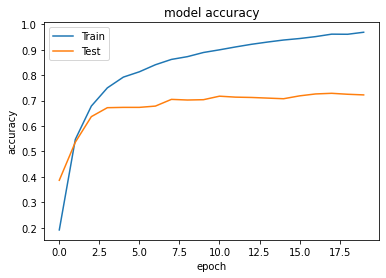

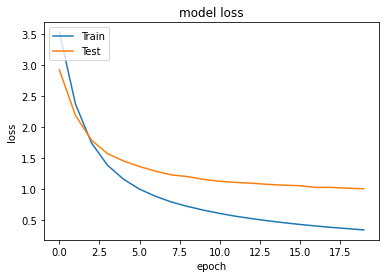

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [7]:
model2 = Sequential()
model2.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model2.add(Dense(units=62,activation='softmax'))
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist2 = model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 5ms/step - loss: 3.6099 - accuracy: 0.1692 - val_loss: 2.9689 - val_accuracy: 0.3693
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 2.3161 - accuracy: 0.5184 - val_loss: 2.0205 - val_accuracy: 0.5302
Epoch 3/20
239/239 [==============================] - 1s 6ms/step - loss: 1.4936 - accuracy: 0.6784 - val_loss: 1.5316 - val_accuracy: 0.6344
Epoch 4/20
239/239 [==============================] - 1s 5ms/step - loss: 1.0893 - accuracy: 0.7596 - val_loss: 1.2871 - val_accuracy: 0.6683
Epoch 5/20
239/239 [==============================] - 1s 5ms/step - loss: 0.8556 - accuracy: 0.8028 - val_loss: 1.1840 - val_accuracy: 0.6721
Epoch 6/20
239/239 [==============================] - 1s 4ms/step - loss: 0.7013 - accuracy: 0.8400 - val_loss: 1.0931 - val_accuracy: 0.6910
Epoch 7/20
239/239 [==============================] - 1s 4ms/step - loss: 0.6025 - accuracy: 0.8698 - val_loss: 1.0605 - val_accuracy: 0.7111
Epoch 

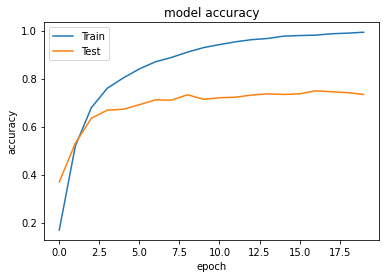

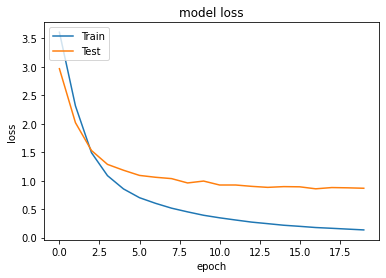

In [8]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [9]:
model3 = Sequential()
model3.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model3.add(Dense(units=256,activation='relu'))
model3.add(Dense(units=62,activation='softmax'))
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist3 = model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 7ms/step - loss: 3.8617 - accuracy: 0.1059 - val_loss: 3.4141 - val_accuracy: 0.2136
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 2.6880 - accuracy: 0.4058 - val_loss: 2.1514 - val_accuracy: 0.4862
Epoch 3/20
239/239 [==============================] - 1s 5ms/step - loss: 1.5890 - accuracy: 0.6068 - val_loss: 1.5010 - val_accuracy: 0.6131
Epoch 4/20
239/239 [==============================] - 1s 5ms/step - loss: 1.0853 - accuracy: 0.7161 - val_loss: 1.2337 - val_accuracy: 0.6709
Epoch 5/20
239/239 [==============================] - 1s 5ms/step - loss: 0.8359 - accuracy: 0.7688 - val_loss: 1.1381 - val_accuracy: 0.6834
Epoch 6/20
239/239 [==============================] - 1s 5ms/step - loss: 0.6828 - accuracy: 0.8149 - val_loss: 1.0248 - val_accuracy: 0.7198
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 0.5539 - accuracy: 0.8509 - val_loss: 1.0446 - val_accuracy: 0.6985
Epoch 

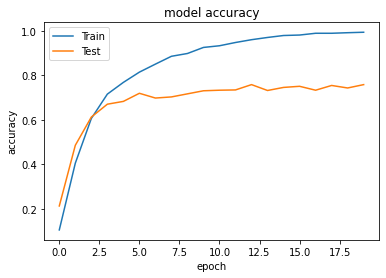

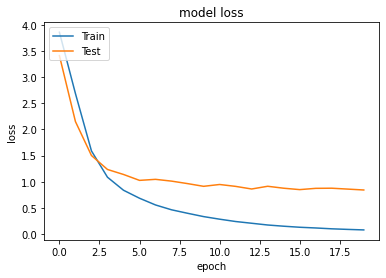

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [11]:
model4 = Sequential()
model4.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model4.add(Dense(units=62,activation='softmax'))
model4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist4 = model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 5ms/step - loss: 3.6799 - accuracy: 0.1478 - val_loss: 3.0618 - val_accuracy: 0.3505
Epoch 2/20
239/239 [==============================] - 1s 4ms/step - loss: 2.3927 - accuracy: 0.5000 - val_loss: 2.0727 - val_accuracy: 0.5226
Epoch 3/20
239/239 [==============================] - 1s 5ms/step - loss: 1.5400 - accuracy: 0.6642 - val_loss: 1.6006 - val_accuracy: 0.6043
Epoch 4/20
239/239 [==============================] - 1s 4ms/step - loss: 1.1187 - accuracy: 0.7492 - val_loss: 1.3522 - val_accuracy: 0.6520
Epoch 5/20
239/239 [==============================] - 1s 5ms/step - loss: 0.8829 - accuracy: 0.7998 - val_loss: 1.2132 - val_accuracy: 0.6721
Epoch 6/20
239/239 [==============================] - 1s 5ms/step - loss: 0.7244 - accuracy: 0.8400 - val_loss: 1.1165 - val_accuracy: 0.7048
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 0.6097 - accuracy: 0.8601 - val_loss: 1.0494 - val_accuracy: 0.7186
Epoch 

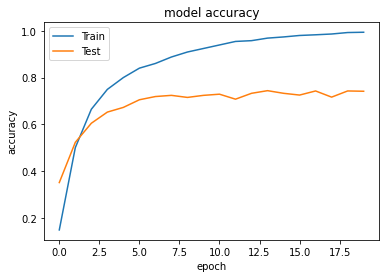

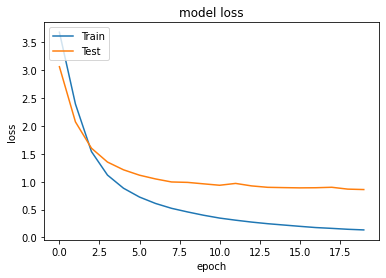

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [13]:
model5 = Sequential()
model5.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=62,activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist5 = model5.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 4s 13ms/step - loss: 2.5173 - accuracy: 0.3375 - val_loss: 1.5151 - val_accuracy: 0.5440
Epoch 2/20
239/239 [==============================] - 3s 13ms/step - loss: 0.9544 - accuracy: 0.6872 - val_loss: 1.1470 - val_accuracy: 0.6558
Epoch 3/20
239/239 [==============================] - 3s 11ms/step - loss: 0.5410 - accuracy: 0.8208 - val_loss: 1.1847 - val_accuracy: 0.6671
Epoch 4/20
239/239 [==============================] - 2s 8ms/step - loss: 0.3727 - accuracy: 0.8706 - val_loss: 1.0034 - val_accuracy: 0.7211
Epoch 5/20
239/239 [==============================] - 1s 6ms/step - loss: 0.2224 - accuracy: 0.9234 - val_loss: 1.2084 - val_accuracy: 0.6696
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1769 - accuracy: 0.9418 - val_loss: 1.2616 - val_accuracy: 0.6834
Epoch 7/20
239/239 [==============================] - 2s 6ms/step - loss: 0.1663 - accuracy: 0.9422 - val_loss: 1.8137 - val_accuracy: 0.5992
Epo

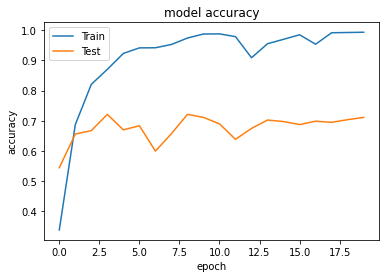

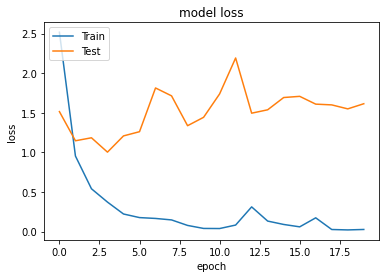

In [14]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [15]:
model6 = Sequential()
model6.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=62,activation='softmax'))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist6 = model6.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 9ms/step - loss: 2.6677 - accuracy: 0.2961 - val_loss: 1.6389 - val_accuracy: 0.4874
Epoch 2/20
239/239 [==============================] - 2s 8ms/step - loss: 1.1274 - accuracy: 0.6386 - val_loss: 1.2587 - val_accuracy: 0.6608
Epoch 3/20
239/239 [==============================] - 2s 9ms/step - loss: 0.6590 - accuracy: 0.7889 - val_loss: 1.2480 - val_accuracy: 0.6294
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.4644 - accuracy: 0.8488 - val_loss: 1.1921 - val_accuracy: 0.6746
Epoch 5/20
239/239 [==============================] - 2s 7ms/step - loss: 0.3595 - accuracy: 0.8685 - val_loss: 1.1373 - val_accuracy: 0.6972
Epoch 6/20
239/239 [==============================] - 2s 8ms/step - loss: 0.2608 - accuracy: 0.9112 - val_loss: 1.2990 - val_accuracy: 0.6897
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.2687 - accuracy: 0.9079 - val_loss: 1.5051 - val_accuracy: 0.6193
Epoch 

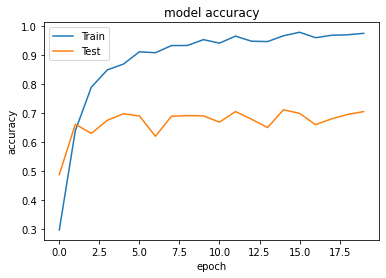

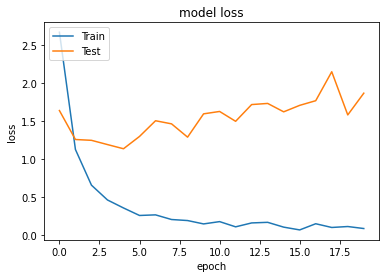

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

WE realized that adding more layer is not affecting accuracy anymore

In [17]:
model7 = Sequential()
model7.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model7.add(Dense(units=256,activation='relu'))
model7.add(Dense(units=256,activation='tanh'))
model7.add(Dense(units=62,activation='softmax'))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist7 = model7.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 9ms/step - loss: 2.3476 - accuracy: 0.3765 - val_loss: 1.4072 - val_accuracy: 0.5867
Epoch 2/20
239/239 [==============================] - 2s 8ms/step - loss: 0.8677 - accuracy: 0.7349 - val_loss: 1.2617 - val_accuracy: 0.6106
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.4950 - accuracy: 0.8442 - val_loss: 1.0743 - val_accuracy: 0.6784
Epoch 4/20
239/239 [==============================] - 2s 8ms/step - loss: 0.2847 - accuracy: 0.9112 - val_loss: 1.0997 - val_accuracy: 0.7035
Epoch 5/20
239/239 [==============================] - 1s 6ms/step - loss: 0.1644 - accuracy: 0.9518 - val_loss: 0.9810 - val_accuracy: 0.7173
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1156 - accuracy: 0.9636 - val_loss: 1.0918 - val_accuracy: 0.7073
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0863 - accuracy: 0.9757 - val_loss: 1.0521 - val_accuracy: 0.7261
Epoch 

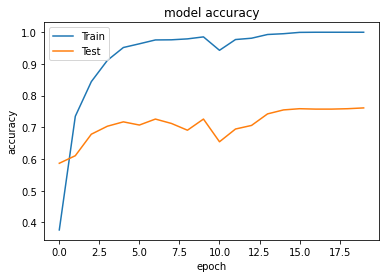

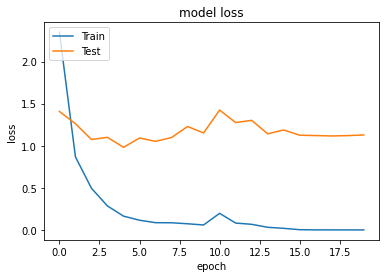

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [19]:
model8 = Sequential()
model8.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model8.add(Dense(units=256,activation='relu'))
model8.add(Dense(units=256,activation='tanh'))
model8.add(BatchNormalization())
model8.add(Dense(units=62,activation='softmax'))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist8= model8.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 9ms/step - loss: 2.0686 - accuracy: 0.4594 - val_loss: 1.7186 - val_accuracy: 0.5188
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 0.8317 - accuracy: 0.7487 - val_loss: 1.1840 - val_accuracy: 0.6759
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.4809 - accuracy: 0.8509 - val_loss: 1.7064 - val_accuracy: 0.5691
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.3297 - accuracy: 0.9037 - val_loss: 1.3268 - val_accuracy: 0.6709
Epoch 5/20
239/239 [==============================] - 2s 8ms/step - loss: 0.2426 - accuracy: 0.9292 - val_loss: 1.3651 - val_accuracy: 0.6558
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1898 - accuracy: 0.9468 - val_loss: 1.4719 - val_accuracy: 0.6231
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1377 - accuracy: 0.9615 - val_loss: 1.4430 - val_accuracy: 0.6533
Epoch 

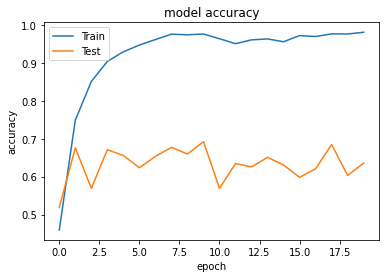

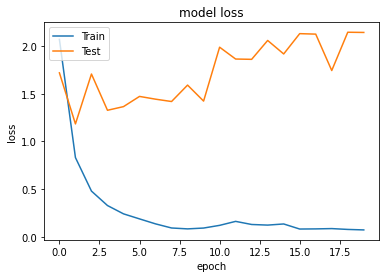

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [21]:
model9 = Sequential()
model9.add(Dense(units=256,input_shape=(1690,),activation='relu'))
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=62,activation='softmax'))
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist9= model9.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 10ms/step - loss: 2.2582 - accuracy: 0.4188 - val_loss: 1.6774 - val_accuracy: 0.5415
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 1.0457 - accuracy: 0.6922 - val_loss: 1.4306 - val_accuracy: 0.6256
Epoch 3/20
239/239 [==============================] - 2s 8ms/step - loss: 0.6586 - accuracy: 0.7986 - val_loss: 1.4497 - val_accuracy: 0.6382
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.4836 - accuracy: 0.8539 - val_loss: 1.9062 - val_accuracy: 0.5377
Epoch 5/20
239/239 [==============================] - 2s 8ms/step - loss: 0.3528 - accuracy: 0.8924 - val_loss: 1.6082 - val_accuracy: 0.6118
Epoch 6/20
239/239 [==============================] - 2s 9ms/step - loss: 0.2856 - accuracy: 0.9154 - val_loss: 1.5683 - val_accuracy: 0.6181
Epoch 7/20
239/239 [==============================] - 2s 8ms/step - loss: 0.2271 - accuracy: 0.9301 - val_loss: 1.2972 - val_accuracy: 0.7048
Epoch

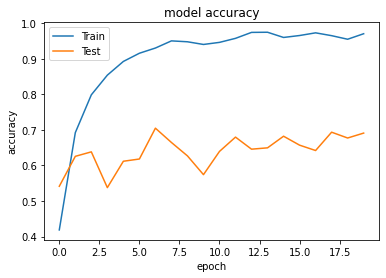

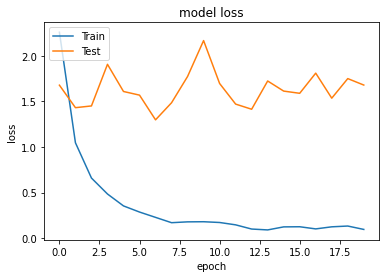

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()